## DFF1 - 2/5 Taux de réussite au BAC

Auteur : Florian Gauthier

Date: 20/12/2016

Data: https://www.data.gouv.fr/fr/datasets/indicateurs-de-resultat-des-lycees-denseignement-general-et-technologique/

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Lecture des données

In [2]:
lycee2015 = pd.read_csv(
    filepath_or_buffer='../../DATA/MEN-DEPP-indicateurs-de-resultats-des-LEGT-2015.csv',
    encoding='latin-1',
    sep=';')

In [3]:
lycee2015.head(2).transpose()

,0,1
Académie,AIX-MARSEILLE,AIX-MARSEILLE
Département,ALPES DE HTE PROVENCE,ALPES DE HTE PROVENCE
Ville,BARCELONNETTE,DIGNE LES BAINS
Commune,04019,04070
Etablissement,LYCEE ANDRE HONNORAT (GENERAL ET TECHNO.),LYCEE ALEXANDRA DAVID NEEL
Code Etablissement,0040003G,0040027H
Secteur Public=PU Privé=PR,PU,PU
Effectif Présents série L,7,40
Effectif Présents série ES,14,33
Effectif Présents série S,20,39



## Stats par département

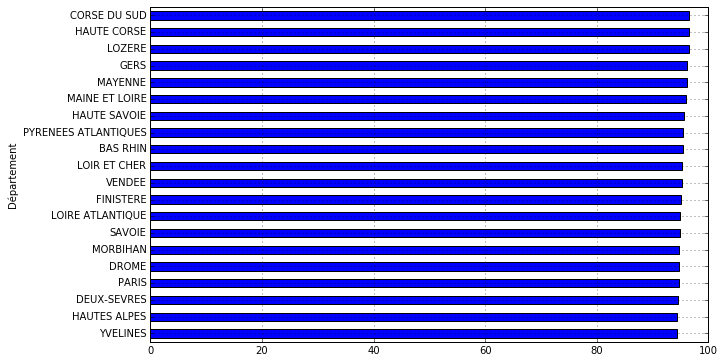

In [21]:
plt.figure(figsize=(10, 6))
lycee2015.groupby('Département')['Taux Brut de Réussite Total séries'].mean().order(ascending=False).head(20).plot(kind='barh')
plt.gca().invert_yaxis()



## Stats par acédémie

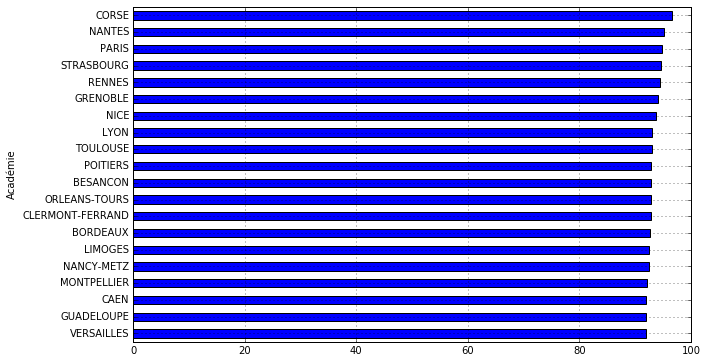

In [22]:
plt.figure(figsize=(10, 6))
lycee2015.groupby('Académie')['Taux Brut de Réussite Total séries'].mean().order(ascending=False).head(20).plot(kind='barh')
plt.gca().invert_yaxis()


## Lien entre les variations d'effectifs entre la seconde et la terminale et le taux de réussite au bac.

In [6]:
effectifs_cols = [
    'Effectif de seconde',
    'Effectif de première',
    'Effectif de terminale']

lycee2015.ix[:, effectifs_cols + ['Taux Brut de Réussite Total séries']].head(2)

,Effectif de seconde,Effectif de première,Effectif de terminale,Taux Brut de Réussite Total séries
0,72,65,52,93
1,254,227,232,93


In [7]:
variations_cols = [
    'variation_seconde_premiere',
    'variation_seconde_terminale',
    'variation_premiere_terminale']

lycee2015['variation_seconde_premiere'] = (lycee2015['Effectif de première'] / lycee2015['Effectif de seconde'] - 1) * 100
lycee2015['variation_premiere_terminale'] = (lycee2015['Effectif de terminale'] / lycee2015['Effectif de première'] - 1) * 100
lycee2015['variation_seconde_terminale'] = (lycee2015['Effectif de terminale'] / lycee2015['Effectif de seconde'] - 1) * 100

lycee2015.ix[:, effectifs_cols + variations_cols + ['Taux Brut de Réussite Total séries']].head(4)

,Effectif de seconde,Effectif de première,Effectif de terminale,variation_seconde_premiere,variation_seconde_terminale,variation_premiere_terminale,Taux Brut de Réussite Total séries
0,72,65,52,-9.722222,-27.777778,-20.000000,93
1,254,227,232,-10.629921,-8.661417,2.202643,93
2,29,20,26,-31.034483,-10.344828,30.000000,94
3,172,174,182,1.162791,5.813953,4.597701,96


In [8]:
lycee2015.ix[:, variations_cols].describe()

,variation_seconde_premiere,variation_seconde_terminale,variation_premiere_terminale
count,2288.000000,2288.000000,2288.000000
mean,inf,inf,-1.612332
std,NaN,NaN,14.798240
min,-64.485981,-89.240506,-87.169811
25%,-21.061583,-24.794228,-9.677419
50%,-12.694384,-15.472426,-2.647150
75%,-2.996269,-4.468027,4.646898
max,inf,inf,113.333333


Wow, il y a des variations d'effectifs gigantesques pour certains lycées.

In [9]:
lycee2015.loc[~np.isfinite(lycee2015.variation_seconde_terminale), effectifs_cols]

,Effectif de seconde,Effectif de première,Effectif de terminale
884,0,27,17
954,0,62,69
1016,0,32,40
1026,0,32,29


In [10]:
# Nombre de lycées français de l'échantillon (2015)
len(lycee2015)

2288

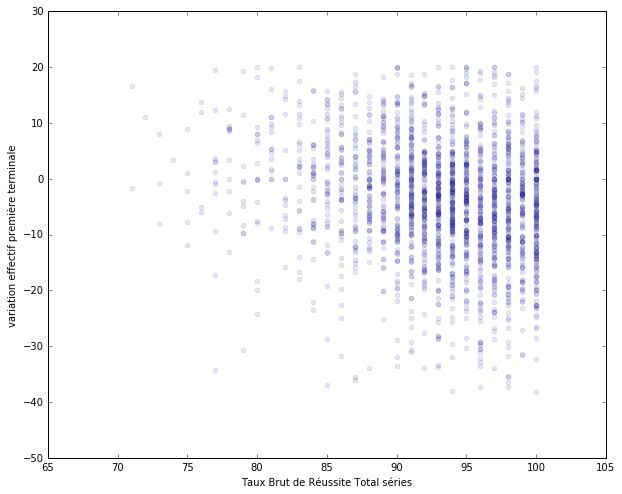

In [20]:
no_outliers = (lycee2015.variation_premiere_terminale > -40) & (lycee2015.variation_premiere_terminale <= 20) & (lycee2015['Taux Brut de Réussite Total séries'] > 70)
plt.figure(figsize=(10, 8))
plt.scatter(
    data=lycee2015.loc[no_outliers],
    x='Taux Brut de Réussite Total séries',
    y='variation_premiere_terminale',
    alpha=0.1)
plt.xlabel('Taux Brut de Réussite Total séries')
plt.ylabel('variation effectif première terminale')

On ne voit pas grand chose, regardons la corrélation de Pearson.

In [12]:
lycee2015.loc[:, variations_cols + ['Taux Brut de Réussite Total séries']].corr(method='pearson')

,variation_seconde_premiere,variation_seconde_terminale,variation_premiere_terminale,Taux Brut de Réussite Total séries
variation_seconde_premiere,1.000000,0.887268,-0.047128,0.072929
variation_seconde_terminale,0.887268,1.000000,0.382390,-0.033449
variation_premiere_terminale,-0.047128,0.382390,1.000000,-0.238636
Taux Brut de Réussite Total séries,0.072929,-0.033449,-0.238636,1.000000


Une corrélation de -0.24 entre le taux de réussite au BAC toutes séries confondues et variation d'effectif entre la première et la terminale. Not bad !

Ainsi, meilleur est le taux de réussite et plus il y a de lycées dont les effectifs sont réduits entre la première et la terminale.